# Employee Sentiment Analysis

This notebook implements the *employee sentiment analysis project* as outlined in the Final LLM Assesment Requirements. It will be organized by tasks:
1. Sentiment Labeling
2. Exploratory Data Analysis
3. Monthly Sentiment Scoring
4. Employee Ranking
5. Flight Risk Identification
6. Linear Regression Modeling

Tools used include: python, pandas, matploblib/seaborn, textblob, scikit-learn.

This project was created by Andrew Cho on July 1st, 2025.

### Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# sets the plot style to ggplot
plt.style.use('ggplot')

In [2]:
data_path = "../data/message_data.csv"
df = pd.read_csv(data_path)

## 01 - Sentiment Labeling

I used **TextBlob**, a lightweight NLP library in Python, to perform sentiment analysis on the `body` column containing employee messages. TextBlob computes a **polarity score** ranging from -1 (most negative) to +1 (most positive).

**Labeling Criteria:**

- **Positive:** Polarity > 0
- **Negative:** Polarity < 0
- **Neutral:** Polarity = 0

**Justification:**

- This rule is **simple, interpretable, and reproducible**, leveraging TextBlob’s internal sentiment lexicon and rule-based polarity scoring.
- TextBlob does not require training data, ensuring rapid implementation for unlabeled datasets such as this project’s.

**Outcome:** Each message was assigned one of three sentiment labels (**Positive, Negative, Neutral**) based on its polarity score.

In [3]:
# Inspect data to understand its structure
print("Dataset loaded successfully. Preview:")
print(df.head(3))
print("\nDataset info:")
print(df.info())

Dataset loaded successfully. Preview:
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   

                   from  
0  sally.beck@enron.com  
1   eric.bass@enron.com  
2  sally.beck@enron.com  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


In [4]:
# Define sentiment labeling function using TextBlob
def get_sentiment_label(text):
    """
    Returns a Positive, Negative, or a Neutral 
    score based on Textblob polarity
    """
    text = str(text)
    polarity = TextBlob(text).sentiment.polarity
    
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labeling to messages in a new column
df['Sentiment Label'] = df['body'].apply(get_sentiment_label)

print("Sentiment labeling complete. Preview:")
print(df.head(3))

# Save newly labeled dataset
df.to_csv("../data/message_data_labeled.csv", index= False)
print("\nSentiment Labeled Dataset saved to ../data/message_data_labeled.csv")

Sentiment labeling complete. Preview:
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   

                   from Sentiment Label  
0  sally.beck@enron.com        Positive  
1   eric.bass@enron.com        Negative  
2  sally.beck@enron.com         Neutral  

Sentiment Labeled Dataset saved to ../data/message_data_labeled.csv


## 02 - Exploratory Data Analysis (EDA)

In [5]:
# Examine overall data structure
print("Dataset shape (rows, columns):", df.shape)
print('\nColumn datatypes:')
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape (rows, columns): (2191, 5)

Column datatypes:
Subject            object
body               object
date               object
from               object
Sentiment Label    object
dtype: object

Missing values:
Subject            0
body               0
date               0
from               0
Sentiment Label    0
dtype: int64


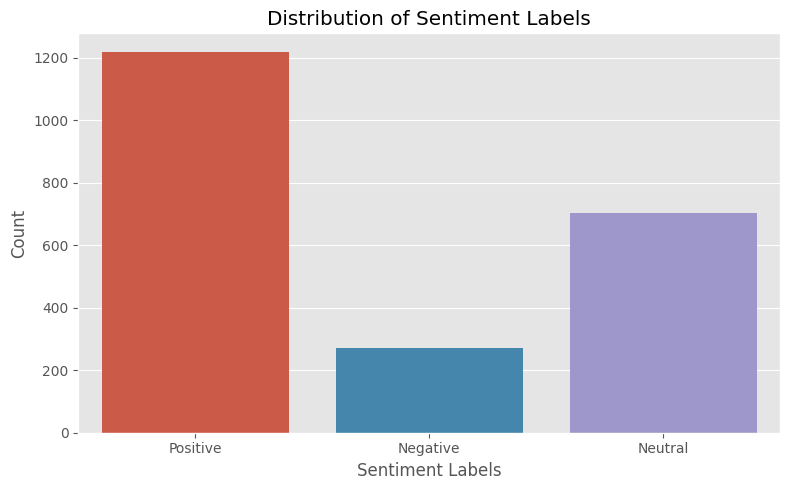

In [6]:
# Analyze sentiment distribution
plt.figure(figsize= (8,5))
sns.countplot(x= "Sentiment Label", data= df, hue= "Sentiment Label")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment Labels")
plt.ylabel("Count")
plt.tight_layout()

# Save figure
plt.savefig("../visualizations/sentiment_label_distribution.png", dpi= 300)
plt.show()


 Null dates after conversion: 0


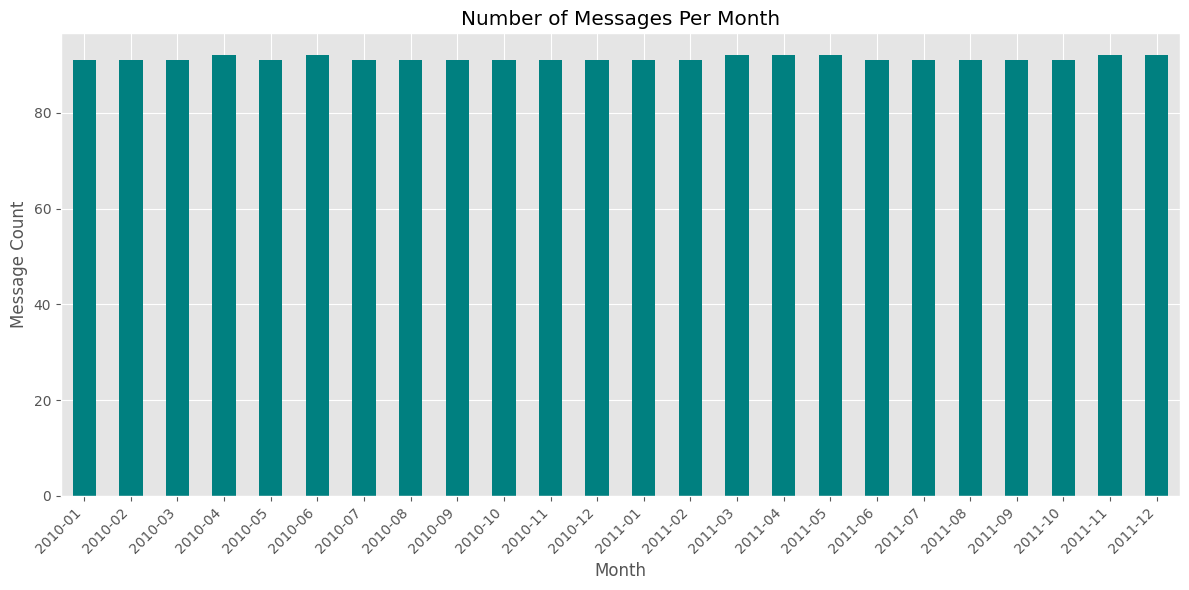

In [7]:
# Convert to datetime and check for null values
df['date'] = pd.to_datetime(df['date'], errors= 'coerce')
print("\n Null dates after conversion:", df['date'].isnull().sum())

# Plot number of messages per month
monthly_messages = df.groupby(df['date'].dt.to_period('M')).size()
plt.figure(figsize= (12,6))
monthly_messages.plot(kind= "bar", color= "teal")
plt.title("Number of Messages Per Month")
plt.xlabel('Month')
plt.ylabel("Message Count")
plt.xticks(rotation= 45, ha= "right")
plt.tight_layout()

# Save figure
plt.savefig("../visualizations/messages_per_month.png", dpi=300)
plt.show()


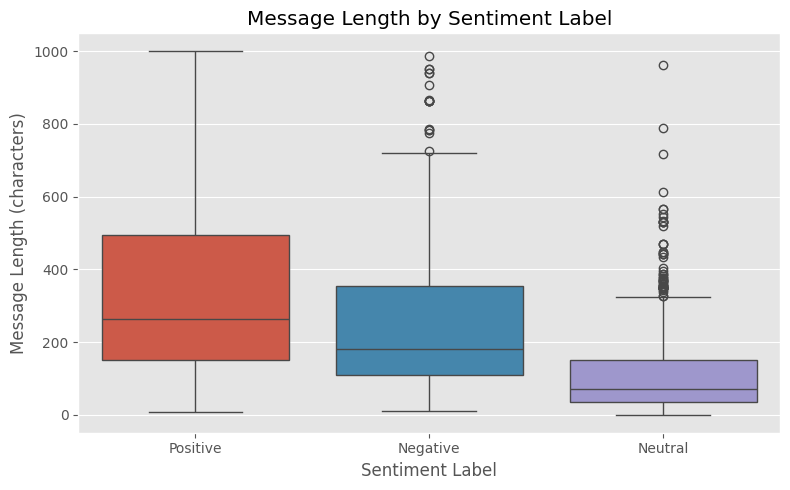

In [8]:
# Calculate average message length per sentinment
df['message length'] = df['body'].apply(lambda x: len(str(x)))

# Create Boxplot for message length by sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='Sentiment Label', y='message length', data=df, hue='Sentiment Label')
plt.title("Message Length by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("Message Length (characters)")
plt.tight_layout()

# Save figure
plt.savefig("../visualizations/message_length_by sentiment.png", dpi=300)
plt.show()

### EDA Observations

In [9]:
print(f"- Dataset has {df.shape[0]} records with columns:{list(df.columns)}.")
print("- No significant missing values.")
print("- Sentiment label distribution shows positive sentiment label has highest frequency followed by neutral. \n  Negative sentiment label frequency is noticeably lower than Positive sentiment label frequency (see first barplot).")
print(f"- Message activity trends per month stay at a relatively constant rate at around {round(df['message length'].mean())} (see second barplot).")
print("- Message length variation across sentiments explored (see boxplot).")

- Dataset has 2191 records with columns:['Subject', 'body', 'date', 'from', 'Sentiment Label', 'message length'].
- No significant missing values.
- Sentiment label distribution shows positive sentiment label has highest frequency followed by neutral. 
  Negative sentiment label frequency is noticeably lower than Positive sentiment label frequency (see first barplot).
- Message activity trends per month stay at a relatively constant rate at around 260 (see second barplot).
- Message length variation across sentiments explored (see boxplot).


## 03 - Employee Monthly Score